<h1><center>Cardiovascular Disease, Prediction</center></h1>

Heart attack is the second cause of disability in the world. CVD is rapidly increasing day by day, as stated by WHO. Cardiovascular-related problems cause 31% of worldwide deaths. Thus, it's increasingly necessary to be able to identify health habits and symptoms that contribute to heart attacks.

The objective of preparing this notebook is to build a machine learning model that can predict whether or not a patient has heart disease?

We're going to utlize the following workflow:

1. Problem definition
2. Data
3. Importing Dataset & Libraries
4. Data Preprocessing & Cleaning
5. Data Visualizations & Insights

<center><img src='https://i.pinimg.com/originals/87/45/76/874576ebe081d0b3cc15c1a519dcb6c1.gif'></center>

## 1. Problme Statement

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features by IEEE scholars which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

The Dataset Can be accessed directly from IEEE Datasets. <br>
https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive#files

## 3. Importing Dataset & Libraries 

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import PowerTransformer

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# we want our visualization to appear inside the notebook
%matplotlib inline

In [7]:
#Dataset 
heartDf = pd.read_csv("..\Data analysis - EDA\cardiovascular disease.csv")

In [9]:
heartDf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


| Feature | Description |
| :- | :- |
| Age | age of the patient [years]
| Sex | sex of the patient [M: Male, F: Female]
| ChestPainType | chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
| RestingBP | resting blood pressure [mm Hg]
| Cholesterol | serum cholesterol [mm/dl]
| FastingBS | fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
| RestingECG | resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
| MaxHR | maximum heart rate achieved [Numeric value between 60 and 202]
| ExerciseAngina | exercise-induced angina [Y: Yes, N: No]
| Oldpeak | oldpeak = ST [Numeric value measured in depression]
| ST_Slope | the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
| HeartDisease | output class [1: heart disease, 0: Normal]

## 4.  Data Preprocessing & Cleaning

### 4.1. Data Preprocessing

Since most of our categorical columns have limited number of options, we will encode our categorical data using manual integer encoding. This method will also help us handle the data coming from our HTML5 form. Moreover, encoding the columns manually can significantly boost the model performance.

In [20]:
# Sex -> 0 Male, 1 Female 

heartDf.loc[heartDf['Sex'] == 'M', 'Sex'] = '0'
heartDf.loc[heartDf['Sex'] == 'F', 'Sex'] = '1'

heartDf["Sex"] = heartDf["Sex"].astype(str).astype("int64")

In [22]:
# Chest Pain Type -> 0 Typical Angine, 1 Atypical Angine, 2 Non-Anginal Pain, 3 Asyptomatic 

heartDf.loc[heartDf['ChestPainType'] == 'TA', 'ChestPainType'] = '0'
heartDf.loc[heartDf['ChestPainType'] == 'ATA', 'ChestPainType'] = '1'
heartDf.loc[heartDf['ChestPainType'] == 'NAP', 'ChestPainType'] = '2'
heartDf.loc[heartDf['ChestPainType'] == 'ASY', 'ChestPainType'] = '3'

heartDf["ChestPainType"] = heartDf["ChestPainType"].astype(str).astype("int64")

In [23]:
# Resting electrocardiogram results -> 0 Normal, 1 Having ST-T wave abnormality, 
# 2 Having left ventricular hypertrophy

heartDf.loc[heartDf['RestingECG'] == 'Normal', 'RestingECG'] = '0'
heartDf.loc[heartDf['RestingECG'] == 'ST', 'RestingECG'] = '1'
heartDf.loc[heartDf['RestingECG'] == 'LVH', 'RestingECG'] = '2'

heartDf["RestingECG"] = heartDf["RestingECG"].astype(str).astype("int64")

In [24]:
# ExerciseAngina -> 0 No, 1 Yes

heartDf.loc[heartDf['ExerciseAngina'] == 'N', 'ExerciseAngina'] = '0'
heartDf.loc[heartDf['ExerciseAngina'] == 'Y', 'ExerciseAngina'] = '1'

heartDf["ExerciseAngina"] = heartDf["ExerciseAngina"].astype(str).astype("int64")

In [26]:
heartDf

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,Up,0
1,49,1,2,160,180,0,0,156,0,1.0,Flat,1
2,37,0,1,130,283,0,1,98,0,0.0,Up,0
3,48,1,3,138,214,0,0,108,1,1.5,Flat,1
4,54,0,2,150,195,0,0,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,Flat,1
914,68,0,3,144,193,1,0,141,0,3.4,Flat,1
915,57,0,3,130,131,0,0,115,1,1.2,Flat,1
916,57,1,1,130,236,0,2,174,0,0.0,Flat,1


In [47]:
# The slope of the peak exercise ST segment 
# 0 Upsloping, 1 Flat, 2 Downsloping 

heartDf.loc[heartDf['ST_Slope'] == 'Up', 'ST_Slope'] = '0'
heartDf.loc[heartDf['ST_Slope'] == 'Flat', 'ST_Slope'] = '1'
heartDf.loc[heartDf['ST_Slope'] == 'Down', 'ST_Slope'] = '2'

heartDf["ST_Slope"] = heartDf["ST_Slope"].astype("float64").astype("int64")

In [49]:
heartDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


### 4.2. Outliers Detection

In [60]:
num_cols = [heartDf["Age"],heartDf["RestingBP"], heartDf["Cholesterol"], 
            heartDf["FastingBS"],heartDf["MaxHR"],heartDf["Oldpeak"]]

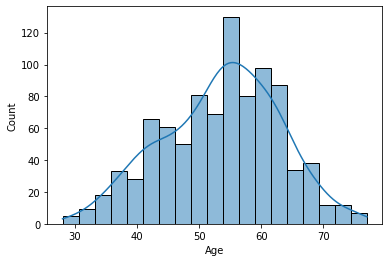

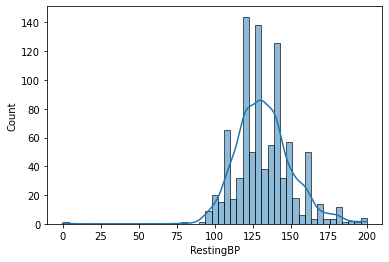

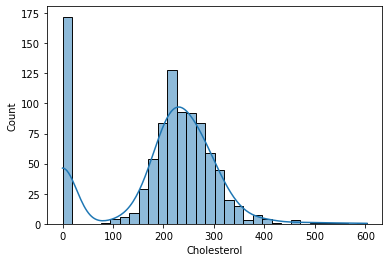

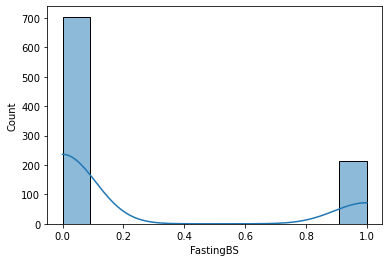

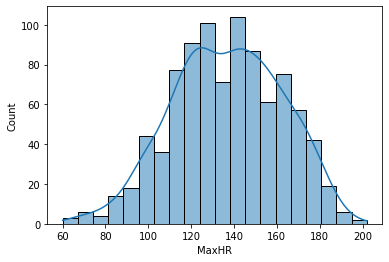

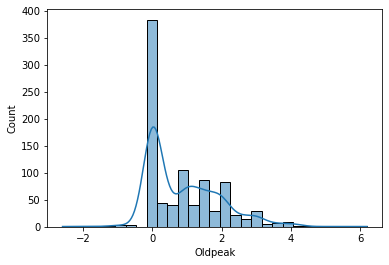

In [62]:
for col in num_cols:
    sns.histplot(x = col , data = heartDf , kde = True)
    plt.show()

Observations: 
- Age and MaxHR almost follow the noraml distribution. 
- RestingBP is slightly Right Skewed.

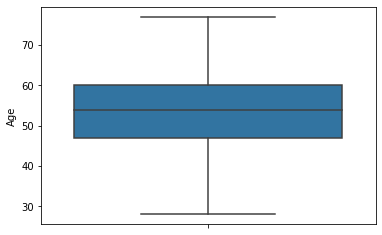

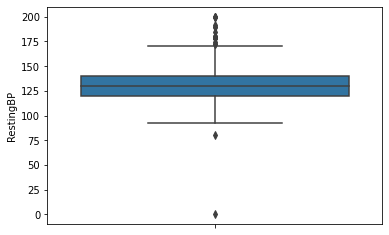

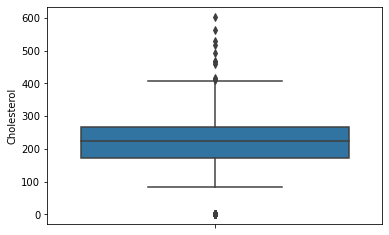

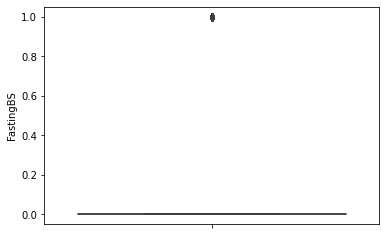

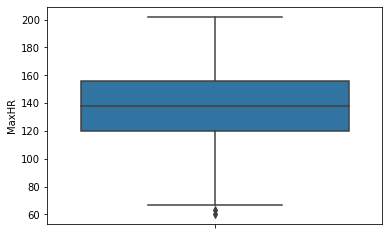

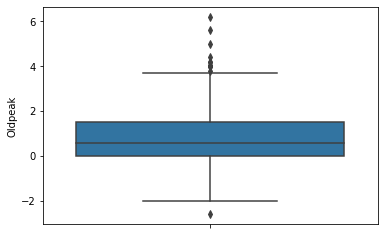

In [61]:
# Checking for the Outlier in the dataset

for col in num_cols:
    sns.boxplot(y = col , data = heartDf)
    plt.show()

Machine learning algorithms are sensitive to the range and distribution of attribute values. Data outliers can spoil and mislead the training process resulting in longer training times, less accurate models and ultimately poorer results.

Columns with outliers are: 
- RestingBP 
- Cholesterol 
- MaxHR
- OldPeak

### 4.3. Handling Outliers

We will handle the outliers in two different ways, one for the normally distributed features and the other for the rest attributes. 

#### 4.3.1. Normal Distributed Attributes

- Considering the value that are more than 3 standard deviation away from the mean as outlier.
- Then replacing the outliers with the random number between the lower range and the upper range of the respective feature.
- Lower range is the value which is exactly 3 standard deviation from the mean at the left side and upper range is the value which is exactly 3 standard deviation from the mean at the right side.

In [68]:
normal_cols = ["Age","MaxHR","RestingBP"]
for col in normal_cols:
    mean = np.mean(heartDf[col])
    std = np.std(heartDf[col])
    lower_range = mean - (3*std)
    upper_range = mean + (3*std)
    heartDf[col] = np.where(((heartDf[col] < lower_range) | (heartDf[col] > upper_range))
                            ,random.randint(int(lower_range),int(upper_range)),heartDf[col])

#### 4.3.2. The Rest of the Attributes (The IQR meathod) 

- Handling Ouliers from Cholestrol feature by using the IQR meathod and replacing it by the random number between the lower bound and the upper bound.
- lower bound is the lower whisker of boxplot and upper bound in the upper whisker of boxplot.

In [71]:
IQR = np.percentile(heartDf["Cholesterol"],75) - np.percentile(heartDf["Cholesterol"],25)
lower_bound = np.percentile(heartDf["Cholesterol"],25) - 1.5 * IQR
upper_bound = np.percentile(heartDf["Cholesterol"],75) + 1.5 * IQR
median_cholesterol = np.median(heartDf["Cholesterol"])

heartDf["Cholesterol"] = np.where(((heartDf["Cholesterol"] > upper_bound) | (heartDf["Cholesterol"] < lower_bound)) 
                                 ,random.randint(int(np.percentile(heartDf["Cholesterol"],25)),
                                                 int(np.percentile(heartDf["Cholesterol"],75))),heartDf["Cholesterol"])

## 5.  Machine Learning Model

### 5.1. Splitting the Dataset

In [83]:
X = heartDf.drop("HeartDisease" , axis = 1)
Y = heartDf['HeartDisease']

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### 5.2. Feature Scaling

In [109]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 5.3. Building The Model

#### 5.3.1. K-Nearest Neighbors Algorithm

In [110]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,50,2)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [120]:
knn_gscv.best_params_

{'n_neighbors': 11}

- Best K value is 11 according to the K-Fold Cross-Validation

In [119]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

print(knn.score(X_test,Y_test))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

0.8876811594202898
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       126
           1       0.89      0.90      0.90       150

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

[[110  16]
 [ 15 135]]


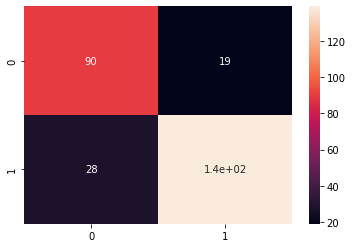

In [124]:
import seaborn as sns
sns.heatmap(cm, annot=True);

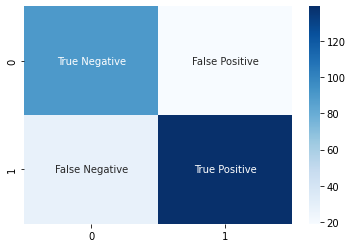

In [125]:
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues');

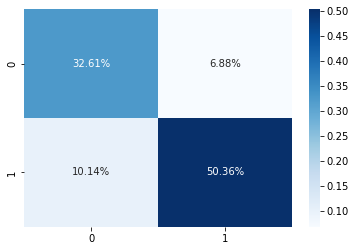

In [122]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');